In [16]:
# importing Libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
import io
import requests

In [17]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [18]:
input_data = pd.read_csv("/home/ubuntu/Desktop/Projects/Admission/Data.csv")


In [19]:
# Missing Value Treatment

input_data.apply(lambda x: sum(x.isnull()) )

admit    0
gre      0
gpa      0
rank     0
dtype: int64

In [20]:
print(input_data.head())

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


In [21]:
#info about the data
print(input_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB
None


In [22]:
#figure out non NA values
print(input_data.count())

admit    400
gre      400
gpa      400
rank     400
dtype: int64


In [23]:
#summarize the dataset


print(input_data.sum())

admit       127.00
gre      235080.00
gpa        1355.96
rank        994.00
dtype: float64


In [24]:
#Stats
print(input_data.describe())


            admit         gre         gpa       rank
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000


VISUALIZATION

In [25]:
# Univariate Analysis
import seaborn as sns

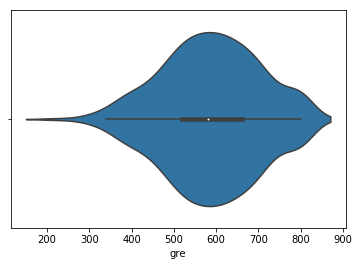

In [26]:
#gre scores
sns.violinplot(x=input_data.iloc[:,1], data=input_data)

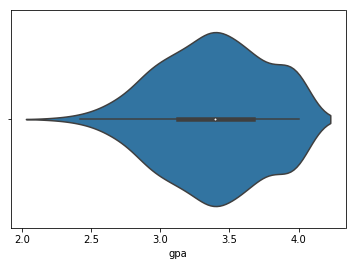

In [27]:
#gpa scores

sns.violinplot(x=input_data.iloc[:,2], data=input_data)

Multivariate Analysis:

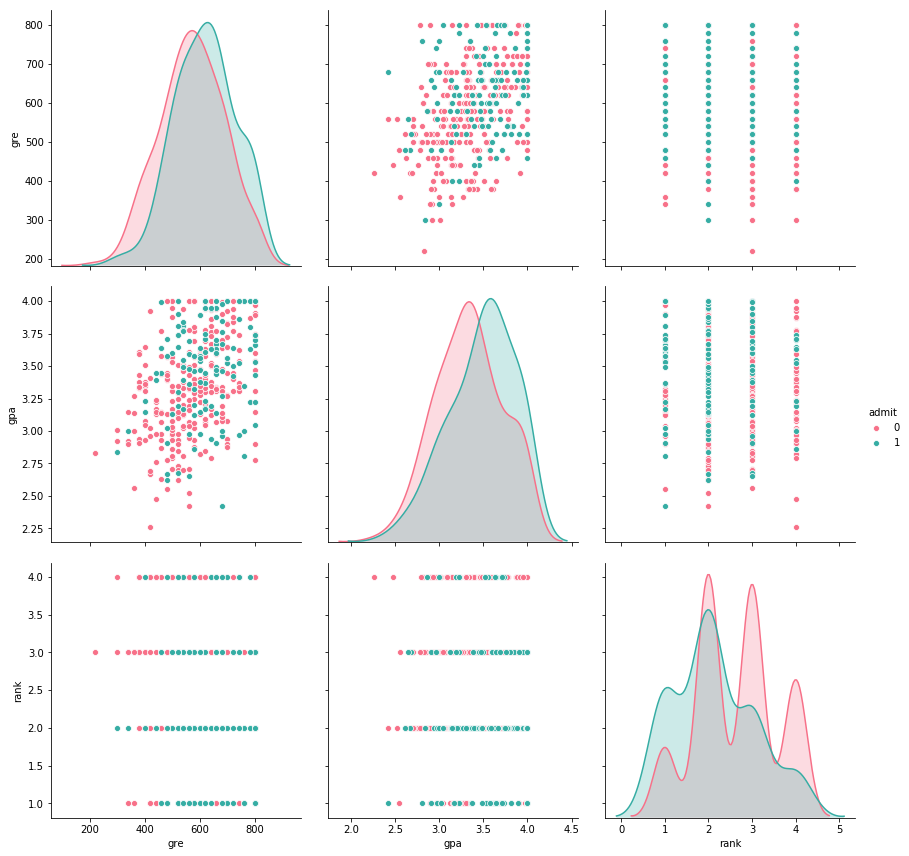

In [28]:


sns.pairplot(input_data, hue='admit',palette="husl", x_vars=["gre","gpa","rank"], y_vars=["gre","gpa","rank"], size=4)
plt.show()



In [29]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [30]:
#Step 1: Convert Dataframe into matrix
dataArray = input_data.values

#Step 2: Splitting Input features & Output Variables
X = dataArray[:,1:4]
y = dataArray[:,0:1]

#Step 3: Splitting training & testing
validation_size = 0.10
seed = 9
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=validation_size, random_state = seed)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(360, 3)
(40, 3)
(360, 1)
(40, 1)


In [31]:
num_trees = 200
max_features = 3
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('SVM', SVC()))

In [32]:

#Fit Models and Evaulate

results = []
names = []
scoring = 'accuracy'

#Cross Validation
for name, model in models:
    kfold = KFold(n_splits = 10, random_state=7)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.694444 (0.087841)
RF: 0.680556 (0.037782)
SVM: 0.658333 (0.093830)


In [33]:
#Create LR prediction model
model = LogisticRegression()

#Fit model
model.fit(X_train, Y_train)

#Predictions 
predictions_LR = model.predict(X_test)

#Accuracy
print("Model --- LogisticRegression")
print("Accuracy: {} ".format(accuracy_score(Y_test,predictions_LR) * 100))
print(classification_report(Y_test, predictions_LR))

Model --- LogisticRegression
Accuracy: 77.5 
             precision    recall  f1-score   support

        0.0       0.81      0.94      0.87        31
        1.0       0.50      0.22      0.31         9

avg / total       0.74      0.78      0.74        40



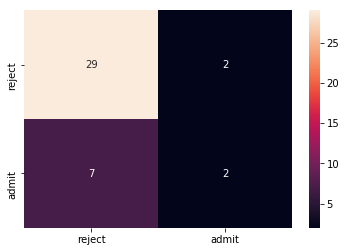

<Figure size 216x216 with 0 Axes>

In [34]:
#plotting confusion matrix on heatmap
cm = confusion_matrix(Y_test, predictions_LR)
sns.heatmap(cm, annot=True, xticklabels=['reject','admit'], yticklabels=['reject','admit'])
plt.figure(figsize=(3,3))
plt.show()

In [35]:
#Create SVC prediction model
model = SVC()

#Fit model
model.fit(X_train, Y_train)

#Predictions 
predictions_SVC = model.predict(X_test)

#Check Accuracy
print("Model --- SVC")
print("Accuracy: {} ".format(accuracy_score(Y_test,predictions_SVC) * 100))
print(classification_report(Y_test, predictions_SVC))

Model --- SVC
Accuracy: 72.5 
             precision    recall  f1-score   support

        0.0       0.79      0.87      0.83        31
        1.0       0.33      0.22      0.27         9

avg / total       0.69      0.72      0.70        40



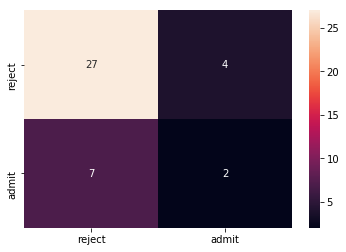

<Figure size 216x216 with 0 Axes>

In [36]:
#plotting confusion matrix on heatmap
cm = confusion_matrix(Y_test, predictions_SVC)
sns.heatmap(cm, annot=True, xticklabels=['reject','admit'], yticklabels=['reject','admit'])
plt.figure(figsize=(3,3))
plt.show()

In [37]:
#Create RF prediction model
model = RandomForestClassifier()

#Fit model
model.fit(X_train, Y_train)

#Predictions 
predictions_RF = model.predict(X_test)

#Check Accuracy
print("Model --- RandomForest")
print("Accuracy: {} ".format(accuracy_score(Y_test,predictions_RF) * 100))
print(classification_report(Y_test, predictions_RF))

Model --- RandomForest
Accuracy: 67.5 
             precision    recall  f1-score   support

        0.0       0.80      0.77      0.79        31
        1.0       0.30      0.33      0.32         9

avg / total       0.69      0.68      0.68        40



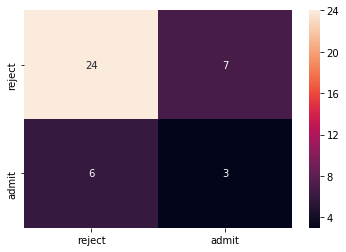

<Figure size 216x216 with 0 Axes>

In [38]:
#plotting confusion matrix on heatmap
cm = confusion_matrix(Y_test, predictions_RF)
sns.heatmap(cm, annot=True, xticklabels=['reject','admit'], yticklabels=['reject','admit'])
plt.figure(figsize=(3,3))
plt.show()

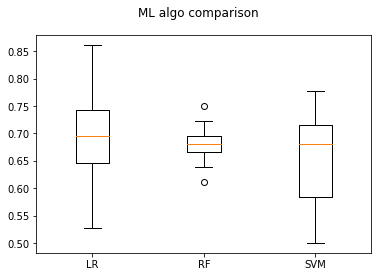

In [40]:
#lets box plot model scores

fig = pyplot.figure()
fig.suptitle('ML algo comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [41]:
#Making predictions on some new data

new_data = [(720,4,1), (300,2,3) , (400,3,4) ]

#Convert to numpy array
new_array = np.asarray(new_data)

#Output Labels
labels=["reject","admit"]

#predictions
prediction=model.predict(new_array)

#Get number of test cases used
no_of_test_cases, cols = new_array.shape

for i in range(no_of_test_cases):
    print("Status of Student with GRE scores = {}, GPA grade = {}, Rank = {} will be ----- {}".format(new_data[i][0],new_data[i][1],new_data[i][2], labels[int(prediction[i])]))

Status of Student with GRE scores = 720, GPA grade = 4, Rank = 1 will be ----- admit
Status of Student with GRE scores = 300, GPA grade = 2, Rank = 3 will be ----- reject
Status of Student with GRE scores = 400, GPA grade = 3, Rank = 4 will be ----- reject
